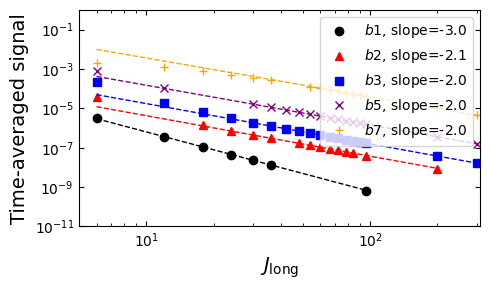

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# === Data (from your Mathematica export) ===
joinedDatab1 = np.array([
    [6, 3.091575354718934e-6], [12, 3.608645476882444e-7], 
    [18, 1.0622786561498287e-7], [24, 4.487003213426988e-8],
    [30, 2.2976813340847002e-8], [36, 1.407024008415192e-8],
    # [48, 6.917084460766887e-9], [54, 5.1534972036258523e-9],
    [96,  6.381465354492433e-10]
    # , [200, 7.088649392258427e-11]
])

joinedDatab2close = np.array([
    [6, 3.5838433374291156e-5], [18, 1.3760567707521432e-6],
    [24, 7.247216163852599e-7], [30, 4.497209223908172e-7],
    [36, 3.05874146566687e-7], [48, 1.687978167241866e-7],
    [54, 1.3269602550103343e-7], [60, 1.0682470008571698e-7],
    [66, 8.787498173568054e-8], [72, 7.343064567510993e-8],
    [78, 6.225129256520745e-8], [84, 5.303990791016844e-8],
    [96, 4.0296426528918516e-8], [200, 8.134147466698494e-9]
])

joinedDatab3close = np.array([
    [6, 2.084078981871018e-4], [12, 1.9598613864468817e-5],
    [18, 6.28452756157305e-6], [24, 3.140477630170224e-6],
    [30, 1.9093301462103085e-6], [36, 1.288140803468174e-6],
    [42, 9.313969194790772e-7], [48, 7.060582722928643e-7],
    [54, 5.532217580705989e-7], [60, 4.4618756267489346e-7],
    [66, 3.6708345452218794e-7], [72, 3.0740546330676466e-7],
    [78, 2.612373606325491e-7], [84, 2.246704169373004e-7],
    [90, 1.9530783812449215e-7], [96, 1.7126216134144556e-7],
    [200, 3.814327098616843e-8], [300, 1.6452204154582262e-8]
])

joinedDatab5close = np.array([
    [6, 7.918667504019927e-4], [12, 1.0906270523314276e-4],
    [30, 1.6137409391880908e-5], [36, 1.1256427628336674e-5],
    [42, 8.296594351420161e-6], [48, 6.326409764612073e-6],
    [54, 4.98081575683873e-6], [60, 4.040027346996489e-6],
    [66, 3.343686175494298e-6], [72, 2.804451574967004e-6],
    [78, 2.3863207334606784e-6], [84, 2.0597373376896044e-6],
    [90, 1.7952996036463276e-6], [96, 1.576074341480549e-6],
    [200, 3.641079980853945e-7], [300, 1.6270304592502782e-7]
])

joinedDatab7close = np.array([
    [6, 0.0020236105522164695], [12, 0.0013160459387045523],
    [18, 0.0007754578336713132], [24, 0.0005146555368933025],
    [30, 0.00036308877190498743], [36, 0.0002674797576459611],
    [54, 0.00012903445130522075], [60, 0.0001059286365531684],
    [66, 8.845034515200086e-5], [72, 7.491802181033772e-5],
    [78, 6.423737820111538e-5], [84, 5.566981678939031e-5],
    [90, 4.869275873718195e-5], [96, 4.293678966287539e-5],
    [200, 1.0070474258159711e-5], [300, 4.488928146971329e-6]
])

# === Fitting function ===
def loglog_fit(data, start, end):
    """Fit log(y) ~ slope*log(x) + intercept on rows[start:end]."""
    x = data[start:end, 0]
    y = data[start:end, 1]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
    return slope, intercept

# === Apply your Mathematica slice rules ===
slope1, intercept1 = loglog_fit(joinedDatab1, 0, 6)   # Take[1,6]
slope2, intercept2 = loglog_fit(joinedDatab2close, 4, 10)  # Take[2,4]
slope3, intercept3 = loglog_fit(joinedDatab3close, 6, 18)  # Take[2,4]
slope6, intercept6 = loglog_fit(joinedDatab5close, 1, 16) # Take[1,16]
slope7, intercept7 = loglog_fit(joinedDatab7close, 7, 16) # Take[4,16]

# === Plotting ===
fig, ax = plt.subplots(figsize=(5,3))  # PRL one-column figure

datasets = [
    (joinedDatab1, "o", "black", "b1", slope1, intercept1),
    (joinedDatab2close, "^", "red", "b2", slope2, intercept2),
    (joinedDatab3close, "s", "blue", "b3", slope3, intercept3),
    (joinedDatab5close, "x", "purple", "b5", slope6, intercept6),
    (joinedDatab7close, "+", "orange", "b7", slope7, intercept7),
]

for data, marker, color, label, slope, intercept in datasets:
    x, y = data[:,0], data[:,1]

    # Data
    ax.loglog(x, y, marker, color=color, 
              label=fr"${label}$, slope={slope:.1f}")
    # Fitted curve
    xf = np.linspace(min(x), max(x), 200)
    yf = np.exp(intercept + slope*np.log(xf))
    ax.loglog(xf, yf, "--", color=color, lw=1)

# === Styling ===
ax.set_xlabel(r"$J_{\mathrm{long}}$", fontsize=14)
ax.set_ylabel("Time-averaged signal", fontsize=14)
ax.set_xlim(5, 310)
ax.set_ylim(1e-11, 1)
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="upper right")
fig.tight_layout()

fig.savefig("plt/TimeAvgSignalLoga0AllPlot2.svg", dpi=600, bbox_inches="tight")
plt.show()


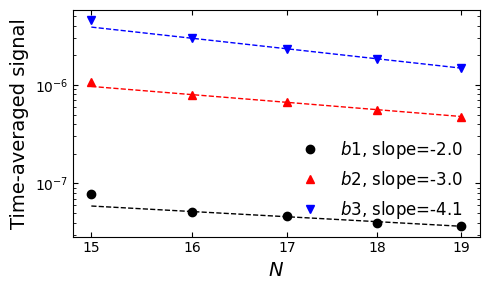

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# === Data ===
joinedDataNa0b1WithKac = np.array([
    [15, 7.890771030651049e-8],
    [16, 5.168506611585855e-8],
    [17, 4.661842190056831e-8],
    [18, 3.999898977874162e-8],
    [19, 3.71151221082086e-8]
])


joinedDataNa0b2WithKacclose = np.array([
    [15, 1.078164934941657e-6],
    [16, 7.934012142829516e-7],
    [17, 6.691598221086892e-7],
    [18, 5.611512832182086e-7],
    [19, 4.767237098587176e-7]
])

joinedDataNa0b3WithKacclose = np.array([
    [15, 4.528536924823823e-6],
    [16, 2.987289981493113e-6],
    [17, 2.327237098587176e-6],
    [18, 1.838672820331233e-6],
    [19, 1.481598221086892e-6]
])

# === Fit helper ===
def loglog_fit(data, start=None, end=None):
    """Fit log(y) ~ slope*log(x) + intercept on selected slice of data."""
    if start is None: start = 0
    if end is None: end = len(data)
    x = data[start:end, 0]
    y = data[start:end, 1]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
    return slope, intercept


# === Compute slopes/intercepts ===
slope1, intercept1 = loglog_fit(joinedDataNa0b1WithKac, start=1, end=5)   # Take[1,5]
slope2, intercept2 = loglog_fit(joinedDataNa0b2WithKacclose, start=1, end=5) # Take[2,4]
slope3, intercept3 = loglog_fit(joinedDataNa0b3WithKacclose, start=2, end=5) # Take[3,5]

# === Plot ===
fig, ax = plt.subplots(figsize=(5,3))  # PRL one-column

datasets = [
    (joinedDataNa0b1WithKac,    "o", "black",  "b1", slope1, intercept1),
    (joinedDataNa0b2WithKacclose,"^", "red",   "b2", slope2, intercept2),
    (joinedDataNa0b3WithKacclose,"v", "blue",  "b3", slope3, intercept3),
]

for data, marker, color, label, slope, intercept in datasets:
    x, y = data[:,0], data[:,1]
    ax.loglog(x, y, marker, color=color, 
              label=fr"${label}$, slope={slope:.1f}")

    # Fit curve
    xf = np.linspace(min(x), max(x), 200)
    yf = np.exp(intercept + slope*np.log(xf))
    ax.loglog(xf, yf, "--", color=color, lw=1)

from matplotlib.ticker import FixedLocator, FuncFormatter

# === Styling ===
ax.set_xlabel(r"$N$", fontsize=14)
ax.set_ylabel("Time-averaged signal", fontsize=14)
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=12, frameon=False,
          loc="center", bbox_to_anchor=(0.75, 0.25))


# Force only specific integer ticks on log x-axis
xticks = [15, 16, 17, 18, 19]
ax.set_xticks(xticks)                     # major ticks
ax.xaxis.set_minor_locator(FixedLocator([]))  # remove minor ticks
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))

fig.tight_layout()



# === Save ===
fig.savefig("plt/ScalingWithN_a0.svg", dpi=600, bbox_inches="tight")

plt.show()



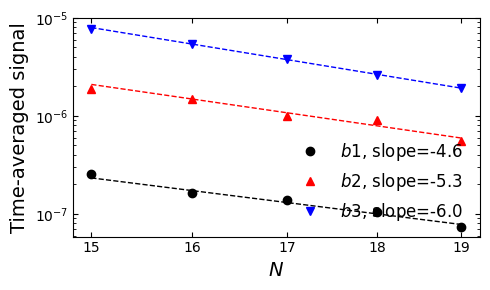

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# === Data ===
joinedDataNa0b1WithKac = np.array([
    [15, 2.550771030651049e-7],
    [16, 1.633701322317171e-7],
    [17, 1.3985526570170492e-7],
    [18, 1.0399737342472821e-7],
    [19, 7.42302442164172e-8]
])


joinedDataNa0b2WithKacclose = np.array([
    [15, 1.899105672720225e-6],
    [16, 1.4828823835522087e-6],
    [17, 1.0084572399371439e-6],
    [18, 9.02662778067986e-7],
    [19, 5.550771030651049e-7]
])

joinedDataNa0b3WithKacclose = np.array([
    [15, 7.69401665712266e-6],
    [16, 5.416972703731204e-6],
    [17, 3.758297506539776e-6],
    [18, 2.6281204767997224e-6],
    [19, 1.9245454922464e-6]
])

# === Fit helper ===
def loglog_fit(data, start=None, end=None):
    """Fit log(y) ~ slope*log(x) + intercept on selected slice of data."""
    if start is None: start = 0
    if end is None: end = len(data)
    x = data[start:end, 0]
    y = data[start:end, 1]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
    return slope, intercept


# === Compute slopes/intercepts ===
slope1, intercept1 = loglog_fit(joinedDataNa0b1WithKac, start=1, end=5)   # Take[1,5]
slope2, intercept2 = loglog_fit(joinedDataNa0b2WithKacclose, start=1, end=5) # Take[2,4]
slope3, intercept3 = loglog_fit(joinedDataNa0b3WithKacclose, start=2, end=5) # Take[3,5]

# === Plot ===
fig, ax = plt.subplots(figsize=(5,3))  # PRL one-column

datasets = [
    (joinedDataNa0b1WithKac,    "o", "black",  "b1", slope1, intercept1),
    (joinedDataNa0b2WithKacclose,"^", "red",   "b2", slope2, intercept2),
    (joinedDataNa0b3WithKacclose,"v", "blue",  "b3", slope3, intercept3),
]

for data, marker, color, label, slope, intercept in datasets:
    x, y = data[:,0], data[:,1]
    ax.loglog(x, y, marker, color=color, 
              label=fr"${label}$, slope={slope:.1f}")

    # Fit curve
    xf = np.linspace(min(x), max(x), 200)
    yf = np.exp(intercept + slope*np.log(xf))
    ax.loglog(xf, yf, "--", color=color, lw=1)

from matplotlib.ticker import FixedLocator, FuncFormatter

# === Styling ===
ax.set_xlabel(r"$N$", fontsize=14)
ax.set_ylabel("Time-averaged signal", fontsize=14)
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=12, frameon=False,
          loc="center", bbox_to_anchor=(0.75, 0.25))


# Force only specific integer ticks on log x-axis
xticks = [15, 16, 17, 18, 19]
ax.set_xticks(xticks)                     # major ticks
ax.xaxis.set_minor_locator(FixedLocator([]))  # remove minor ticks
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))

fig.tight_layout()



# === Save ===
fig.savefig("plt/ScalingWithN_a0NoKac.svg", dpi=600, bbox_inches="tight")

plt.show()



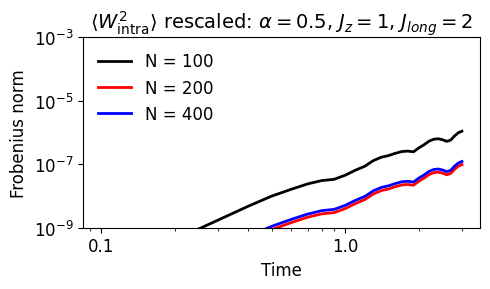

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Example: put your lists here (from Mathematica output)
sitesum100 = np.array([
    [0.1, 2.95795e-11], [0.2, 4.11164e-10], [0.3, 1.71338e-9],
    [0.4, 4.75062e-9], [0.5, 9.95777e-9], [0.6, 1.62452e-8],
    [0.7, 2.40116e-8], [0.8, 3.06272e-8], [0.9, 3.36132e-8],
    [1.0, 4.54229e-8], [1.1, 6.53094e-8], [1.2, 8.64266e-8],
    [1.3, 1.29877e-7], [1.4, 1.66198e-7], [1.5, 1.87698e-7],
    [1.6, 2.21240e-7], [1.7, 2.51343e-7], [1.8, 2.61102e-7],
    [1.9, 2.46807e-7], [2.0, 3.30038e-7], [2.1, 4.14858e-7],
    [2.2, 5.35527e-7], [2.3, 6.15428e-7], [2.4, 6.37870e-7],
    [2.5, 5.93794e-7], [2.6, 5.26324e-7], [2.7, 5.83286e-7],
    [2.8, 7.87361e-7], [2.9, 9.88648e-7], [3.0, 1.10528e-6]
])

sitesum200 = np.array([
    [0.1, 6.31498e-11], [0.2, 7.93421e-11], [0.3, 2.13737e-10],
    [0.4, 4.34403e-10], [0.5, 8.75189e-10], [0.6, 1.44740e-9],
    [0.7, 2.13933e-9], [0.8, 2.73084e-9], [0.9, 2.99738e-9],
    [1.0, 4.02700e-9], [1.1, 5.79881e-9], [1.2, 7.66038e-9],
    [1.3, 1.15110e-8], [1.4, 1.47227e-8], [1.5, 1.66077e-8],
    [1.6, 1.96149e-8], [1.7, 2.22808e-8], [1.8, 2.31438e-8],
    [1.9, 2.18970e-8], [2.0, 2.92229e-8], [2.1, 3.67442e-8],
    [2.2, 4.73733e-8], [2.3, 5.44056e-8], [2.4, 5.63562e-8],
    [2.5, 5.24498e-8], [2.6, 4.64868e-8], [2.7, 5.18199e-8],
    [2.8, 6.98086e-8], [2.9, 8.74469e-8], [3.0, 9.75777e-8]
])

sitesum400 = np.array([
    [0.1, 6.51926e-11], [0.2, 5.37986e-11], [0.3, 2.10346e-10],
    [0.4, 5.36232e-10], [0.5, 1.11159e-9], [0.6, 1.82618e-9],
    [0.7, 2.68316e-9], [0.8, 3.44915e-9], [0.9, 3.79734e-9],
    [1.0, 5.08680e-9], [1.1, 7.31319e-9], [1.2, 9.64373e-9],
    [1.3, 1.44840e-8], [1.4, 1.85285e-8], [1.5, 2.09310e-8],
    [1.6, 2.46757e-8], [1.7, 2.80252e-8], [1.8, 2.91146e-8],
    [1.9, 2.75248e-8], [2.0, 3.68117e-8], [2.1, 4.62894e-8],
    [2.2, 5.96937e-8], [2.3, 6.85384e-8], [2.4, 7.09884e-8],
    [2.5, 6.60122e-8], [2.6, 5.85044e-8], [2.7, 6.50064e-8],
    [2.8, 8.76549e-8], [2.9, 1.09862e-7], [3.0, 1.22571e-7]
])

# --- Rescale like in Mathematica ---
sitesum100Rescaled = np.column_stack([sitesum100[:,0], sitesum100[:,1]])
sitesum200Rescaled = np.column_stack([sitesum200[:,0], sitesum200[:,1]])
sitesum400Rescaled = np.column_stack([sitesum400[:,0], sitesum400[:,1]])


# --- Plot ---
plt.figure(figsize=(5,3))

plt.plot(sitesum100Rescaled[:,0], sitesum100Rescaled[:,1], 'k-', lw=2, label="N = 100")
plt.plot(sitesum200Rescaled[:,0], sitesum200Rescaled[:,1], 'r-', lw=2, label="N = 200")
plt.plot(sitesum400Rescaled[:,0], sitesum400Rescaled[:,1], 'b-', lw=2, label="N = 400")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Frobenius norm", fontsize=12)
plt.title(r"$\langle W_{\mathrm{intra}}^2 \rangle$ rescaled: $\alpha=0.5$, $J_z=1$, $J_{long}=2$",
          fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)  # tick label size
plt.legend(loc="upper left", frameon=False, fontsize=12)

# plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.ylim(1e-9, 1e-3)

# Fix log x-axis ticks to show raw numbers
ax = plt.gca()
ax.set_xscale("log")

# Major ticks at 0.1, 1, 10 ...
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=20))
# Minor ticks for 2–9 between decades
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))

# Force raw number formatting instead of 10^n
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())  # hide minor tick labels if too crowded

ax.set_yscale("log")

# Manually set ticks at alternate powers of 10
ax.set_yticks([1e-9, 1e-7, 1e-5, 1e-3])

plt.tight_layout()

# === Save ===
# plt.savefig("plt/ScalingWithN_a05.svg", dpi=600, bbox_inches="tight")

plt.show()





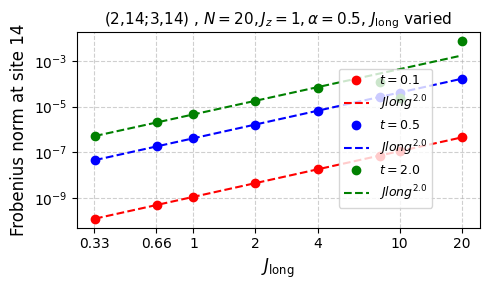

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter

# -----------------------------
# Helper: load Mathematica-style table
# -----------------------------
def load_mathematica_data(filename):
    data = []
    with open(filename, "r") as f:
        for line in f:
            line = line.replace("*^", "e").strip().lstrip("{").rstrip("}")
            if not line:
                continue
            row = []
            for e in line.split(","):
                e = e.strip()
                if "+ 0." in e:
                    e = e.split("+")[0].strip()
                if "*I" in e:
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)

# -----------------------------
# Settings
# -----------------------------
N_values = np.array([10, 20, 30, 60, 120, 240 , 300, 600])
base_path = "src"
site_of_interest = 14
t_targets = [0.1, 0.5, 2.0]
tInterval = 0.01
steps_per_unit = 1 / tInterval

# -----------------------------
# Load data and extract signals
# -----------------------------
signals = {t: [] for t in t_targets}
for N in N_values:
    raw = load_mathematica_data(os.path.join(base_path, f"B0LFIMb2lcfara05VaryJlongWscaling{N}.txt"))
    for t in t_targets:
        ti = min(int(t * steps_per_unit), raw.shape[0] - 1)
        # Average signal over sites 12–16 (inclusive)
        y_mean = np.mean(raw[ti, 14])
        signals[t].append(y_mean)

# -----------------------------
# Plot log–log
# -----------------------------
fig, ax = plt.subplots(figsize=(5, 3))
colors = ["red", "blue", "green"]

for t, c in zip(t_targets, colors):
    x = N_values/30
    y = np.array(signals[t])
    mask = (x > 0) & (y > 0)
    x, y = x[mask], y[mask]

    # Fit only first few points
    n_fit_points = min(4, len(x))
    x_fit_subset = x[:n_fit_points]
    y_fit_subset = y[:n_fit_points]

    # Fit log(y) = log(A) - alpha * log(x)
    slope, intercept = np.polyfit(np.log(x_fit_subset), np.log(y_fit_subset), 1)
    alpha = slope
    A = np.exp(intercept)

    # Generate smooth fit curve
    x_fit = np.geomspace(x.min(), x.max(), 200)
    y_fit = A * x_fit ** (alpha)

    ax.loglog(x, y, "o", color=c, label=fr"$t={t}$", markersize=6)
    ax.loglog(x_fit, y_fit, "--", color=c, label=fr"$Jlong^{{{alpha:.1f}}}$")

# -----------------------------
# Format axes
# -----------------------------
ax.set_xlabel(r"$J_{\mathrm{long}}$", fontsize=12)
ax.set_ylabel(r"Frobenius norm at site 14", fontsize=12)
ax.set_title(r"(2,14;3,14) , $N=20, J_z=1, \alpha=0.5$, $J_{\mathrm{long}}$ varied", fontsize=11)
ax.grid(True, which="major", linestyle="--", alpha=0.6)

# X-axis: plain numbers (no scientific)
major_ticks = [0.33, 0.66, 1, 2, 4, 10, 20]
ax.set_xticks(major_ticks)

# Use ScalarFormatter and disable scientific notation
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)
formatter.set_useOffset(False)
formatter.set_powerlimits((0, 0))
formatter.set_locs(major_ticks)

# Force no trailing zeros
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: ('%g' % x)))
# ax.ticklabel_format(style='plain', axis='x')

# Remove minor ticks
ax.xaxis.set_minor_locator(mticker.NullLocator())
ax.xaxis.set_minor_formatter(mticker.NullFormatter())

# Y-axis: log scale, scientific format
# ax.set_yscale("log")
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))

# Legend
ax.legend(fontsize=9, loc=(0.65, 0.1))

# Layout and save
fig.tight_layout()
plt.savefig("plt/WintraSignal_vs_Jlong.svg", dpi=600, bbox_inches="tight")
plt.show()


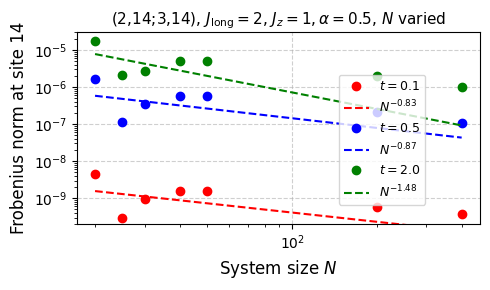

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter

# -----------------------------
# Helper: load Mathematica-style table
# -----------------------------
def load_mathematica_data(filename):
    data = []
    with open(filename, "r") as f:
        for line in f:
            line = line.replace("*^", "e").strip().lstrip("{").rstrip("}")
            if not line:
                continue
            row = []
            for e in line.split(","):
                e = e.strip()
                if "+ 0." in e:
                    e = e.split("+")[0].strip()
                if "*I" in e:
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)

# -----------------------------
# Settings
# -----------------------------
#15, 16, 17, 18, 19, 20, 22, 25, 30, 35, 40, 45, 50,100
N_values = np.array([20, 25, 30, 40, 50, 100, 200, 400])
base_path = "src"
site_of_interest = 14
t_targets = [0.1, 0.5, 2.0]
tInterval = 0.01
steps_per_unit = 1 / tInterval

# -----------------------------
# Load data and extract signals
# -----------------------------
signals = {t: [] for t in t_targets}
for N in N_values:
    raw = load_mathematica_data(os.path.join(base_path, f"B0LFIMb2lcfara05VaryNWscaling{N}.txt"))
    for t in t_targets:
        ti = min(int(t * steps_per_unit), raw.shape[0] - 1)
        # Average signal over sites 12–16 (inclusive)
        y_mean = np.mean(raw[ti, 14])
        signals[t].append(y_mean)

# -----------------------------
# Plot log–log
# -----------------------------
fig, ax = plt.subplots(figsize=(5, 3))
colors = ["red", "blue", "green"]

for t, c in zip(t_targets, colors):
    x = N_values
    y = np.array(signals[t])
    mask = (x > 0) & (y > 0)
    x, y = x[mask], y[mask]

    # Fit only first few points
    n_fit_points = min(4, len(x))
    x_fit_subset = x[:n_fit_points]
    y_fit_subset = y[:n_fit_points]

    # Fit log(y) = log(A) - alpha * log(x)
    slope, intercept = np.polyfit(np.log(x_fit_subset), np.log(y_fit_subset), 1)
    alpha = -slope
    A = np.exp(intercept)

    # Generate smooth fit curve
    x_fit = np.geomspace(x.min(), x.max(), 200)
    y_fit = A * x_fit ** (-alpha)

    ax.loglog(x, y, "o", color=c, label=fr"$t={t}$", markersize=6)
    ax.loglog(x_fit, y_fit, "--", color=c, label=fr"$N^{{-{alpha:.2f}}}$")

# -----------------------------
# Format axes
# -----------------------------
ax.set_xlabel(r"System size $N$", fontsize=12)
ax.set_ylabel(r"Frobenius norm at site 14", fontsize=12)
ax.set_title(r"(2,14;3,14), $J_{\mathrm{long}}=2$, $J_z=1, \alpha=0.5$, $N$ varied", fontsize=11)
ax.grid(True, which="major", linestyle="--", alpha=0.6)

# X-axis: plain numbers (no scientific)
# major_ticks = [20, 100, 200, 400]
# ax.set_xticks(major_ticks)
# ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax.ticklabel_format(style='plain', axis='x')

# # Remove minor ticks
# ax.xaxis.set_minor_locator(mticker.NullLocator())
# ax.xaxis.set_minor_formatter(mticker.NullFormatter())

# Y-axis: log scale, scientific format
# ax.set_yscale("log")
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))

# Legend
ax.legend(fontsize=9, loc=(0.65, 0.1))
plt.ylim(2e-10, 3e-5)
# Layout and save
fig.tight_layout()
plt.savefig("plt/WintraSignal_vs_N.svg", dpi=600, bbox_inches="tight")
plt.show()


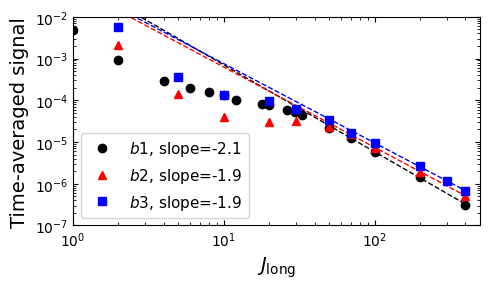

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === Data (from your Mathematica export) ===
import numpy as np

joinedDatab1a05close = np.array([
    [1, 0.004697426449093545],
    [2, 0.0009267235055671064],
    [4, 0.000293795336618785],
    [6, 0.00019608685206450326],
    [8, 0.0001622210999556728],
    [10, 0.0001322541193377302],
    [12, 0.00010225411933773021],
    [18, 0.00008240877136722613],
    [20, 0.00007654685092184366],
    [79/3, 0.00005737978933073595],
    [89/3, 0.00005229129114137088],
    [33, 0.00004428006860957012],
    [50, 0.000021307161577999167],
    [70, 0.000012163980231849614],
    [100, 5.714607176132702e-6],
    [200, 1.472760192022804e-6],
    [400, 3.1432475203829398e-7]
])

joinedDatab2a05close = np.array([
    [2, 0.002168679898905901],
    [5, 0.00014098109083160448],
    [10, 0.000040133990622526206],
    [20, 0.000030544186258474326],
    [30, 0.000031667735475582326],
    [50, 0.00002306168887922233],
    [70, 0.000015226326724016026],
    [100, 7.210533668700059e-6],
    [200, 1.9351217270813237e-6],
    [400, 5.225403522102212e-7]
])

joinedDatab3a05close = np.array([
    [2, 0.005783814034761581],
    [5, 0.000358523477855921],
    [10, 0.00013698369889247886],
    [20, 0.000094173327132685],
    [30, 0.00006149681161560228],
    [50, 0.00003345690006817392],
    [70, 0.000016072686202184272],
    [100, 9.361767919324748e-6],
    [200, 2.6550007748982196e-6],
    [300, 1.1781275894851007e-6],
    [400, 6.738440252451738e-7]
])



# === Fitting function ===
def loglog_fit(data, start, end):
    """Fit log(y) ~ slope*log(x) + intercept on rows[start:end]."""
    x = data[start:end, 0]
    y = data[start:end, 1]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
    return slope, intercept

# === Apply your Mathematica slice rules ===
slope1, intercept1 = loglog_fit(joinedDatab1a05close, 13, 17)   # Take[1,6]
slope2, intercept2 = loglog_fit(joinedDatab2a05close, 6, 10)  # Take[2,4]
slope3, intercept3 = loglog_fit(joinedDatab3a05close, 7, 11)  # Take[2,4]


# === Plotting ===
fig, ax = plt.subplots(figsize=(5,3))  # PRL one-column figure

datasets = [
    (joinedDatab1a05close, "o", "black", "b1", slope1, intercept1),
    (joinedDatab2a05close, "^", "red", "b2", slope2, intercept2),
    (joinedDatab3a05close, "s", "blue", "b3", slope3, intercept3),
]

for data, marker, color, label, slope, intercept in datasets:
    x, y = data[:,0], data[:,1]

    # Data
    ax.loglog(x, y, marker, color=color, 
              label=fr"${label}$, slope={slope:.1f}")

    # Fitted curve
    xf = np.linspace(min(x), max(x), 200)
    yf = np.exp(intercept + slope*np.log(xf))
    ax.loglog(xf, yf, "--", color=color, lw=1)

# === Styling ===
ax.set_xlabel(r"$J_{\mathrm{long}}$", fontsize=14)
ax.set_ylabel("Time-averaged signal", fontsize=14)
ax.set_xlim(1, 500)
ax.set_ylim(1e-7, 1e-2)
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=11, frameon=True, loc="lower left")
fig.tight_layout()

fig.savefig("plt/WinterWintraScalinga05close.svg", dpi=600, bbox_inches="tight")
plt.show()


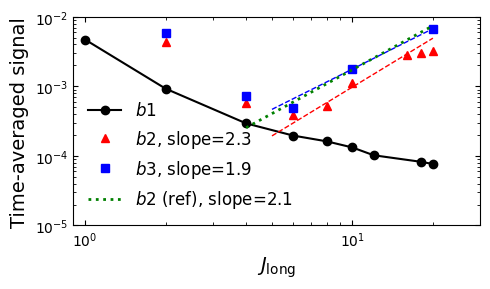

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# === Data (from your Mathematica export) ===
import numpy as np

joinedDatab1a05close = np.array([
    [1, 0.004697426449093545],
    [2, 0.0009267235055671064],
    [4, 0.000293795336618785],
    [6, 0.00019608685206450326],
    [8, 0.0001622210999556728],
    [10, 0.0001322541193377302],
    [12, 0.00010225411933773021],
    [18, 0.00008240877136722613],
    [20, 0.00007654685092184366]
    # [79/3, 0.00005737978933073595],
    # [89/3, 0.00005229129114137088],
    # [33, 0.00004428006860957012],
    # [50, 0.000021307161577999167],
    # [70, 0.000012163980231849614],
    # [100, 5.714607176132702e-6],
    # [200, 1.472760192022804e-6],
    # [400, 3.1432475203829398e-7]
])

joinedDatab2a05far = np.array([
    [2, 0.004342806247851765],
    [4, 0.0005828108209297023],
    [6, 0.0003840964800886498],
    [8, 0.0005296528643565779],
    [10, 0.0011217330438584305],
    [16, 0.0028021636818231777],
    [18, 0.0029944314080168066],
    [20, 0.0031965865751362177]
    # [22, 0.002703038401730695],
    # [24, 0.002454010939258011],
    # [26, 0.002518846815154796],
    # [30, 0.0019986517196441955]
])

joinedDatab3a05far = np.array([
    [2, 0.005844737723705652],
    [4, 0.0007315140366463597],
    [6, 0.00048632782514648163],
    [10, 0.0017756526273089435],
    [20, 0.00674951920450273]
])

joinedDatab2b2a05far = np.array([
    [61/30, 0.00006664220427900821],
    [27/10, 0.00010119500759047573],
    [10, 0.0017688328649907508],
    [20, 0.01188167989453862]
])



# === Fitting function ===
def loglog_fit(data, start, end):
    """Fit log(y) ~ slope*log(x) + intercept on rows[start:end]."""
    x = data[start:end, 0]
    y = data[start:end, 1]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)
    return slope, intercept

# === Apply your Mathematica slice rules ===
slope1, intercept1 = loglog_fit(joinedDatab1a05close, 6, 9)   # Take[1,6]
slope2, intercept2 = loglog_fit(joinedDatab2a05far, 3, 6)  # Take[2,4]
slope3, intercept3 = loglog_fit(joinedDatab3a05far, 3, 5)  # Take[2,4]
slope4, intercept4 = loglog_fit(joinedDatab2b2a05far, 0, 3)  # Take[2,4]


# === Plotting ===
fig, ax = plt.subplots(figsize=(5,3))  # PRL one-column figure

datasets = [
    (joinedDatab1a05close, "o", "black", "b1", slope1, intercept1, False),  # ❌ no slope/fit
    (joinedDatab2a05far, "^", "red", "b2", slope2, intercept2, True),
    (joinedDatab3a05far, "s", "blue", "b3", slope3, intercept3, True),
]

# Plot normal datasets
for data, marker, color, label, slope, intercept, do_fit in datasets:
    x, y = data[:,0], data[:,1]

    # Data
    if do_fit:
        ax.loglog(x, y, marker, color=color,
                  label=fr"${label}$, slope={slope:.1f}")
    else:
        ax.loglog(x, y, marker+"-", color=color,
                  label=fr"${label}$")  # no slope in legend

    # Fit line if requested
    if do_fit:
        xf = np.linspace(5, max(x), 200)
        yf = np.exp(intercept + slope*np.log(xf))
        ax.loglog(xf, yf, "--", color=color, lw=1)

# Plot the reference line (b2b2) as dotted only
x_ref = joinedDatab2b2a05far[:,0]
y_ref = joinedDatab2b2a05far[:,1]
xf = np.linspace(4, max(x_ref), 200)
yf = np.exp(intercept4 + slope4*np.log(xf))
ax.loglog(xf, yf, ":", color="green", lw=2,
          label=fr"$b2$ (ref), slope={slope4:.1f}")

# === Styling ===
ax.set_xlabel(r"$J_{\mathrm{long}}$", fontsize=14)
ax.set_ylabel("Time-averaged signal", fontsize=14)
ax.set_xlim(0.9, 30)
ax.set_ylim(1e-5, 1e-2)
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=12, frameon=False, loc="lower left")
fig.tight_layout()

fig.savefig("plt/WinterWintraScalinga05far.svg", dpi=600, bbox_inches="tight")
plt.show()



